In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/singapore-airlines-reviews/singapore_airlines_reviews.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/singapore-airlines-reviews/singapore_airlines_reviews.csv')

In [4]:
df.head(10)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
5,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0
6,2024-03-10T00:54:43-05:00,Desktop,5,review,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ,0
7,2024-03-09T17:45:56-05:00,Desktop,1,review,Very bad expeirence for flight check in at bai...,Long Q to check in,0
8,2024-03-08T23:10:41-05:00,Desktop,1,review,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed",0
9,2024-03-08T19:18:57-05:00,Desktop,1,review,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.,1


In [5]:
df.tail(10)

,published_date,published_platform,rating,type,text,title,helpful_votes
9990,2018-08-06T13:00:25-04:00,Desktop,5,review,"Best flight ever, attendants were friendly and...",Awesome,0
9991,2018-08-06T12:23:12-04:00,Desktop,1,review,"On May 29, 2018, my wife and I left early from...",Singapore's not so Silk Road from Male to Sing...,2
9992,2018-08-06T09:36:32-04:00,Desktop,5,review,My travel agent booked veg meal for me by mist...,Best airlines in the world,1
9993,2018-08-06T04:44:01-04:00,Mobile,5,review,This airline is the best airline I have ever b...,Absolutely fabulous,1
9994,2018-08-06T04:07:43-04:00,Mobile,3,review,Melbourne to Singapore. \n\nTravelling on Busi...,World’s Best Airline 2018?,1
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2
9999,2018-08-05T20:19:51-04:00,Desktop,4,review,"As always, Singapore Airlines has done it agai...",Delivered as expected :),3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [7]:
# Data Cleaning

# Convert 'published_date' to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])

# Check for missing values in key columns
missing_values = df[['rating', 'published_platform', 'published_date']].isnull().sum()

# Since we're interested in the distribution of ratings for the pie chart, let's also prepare that data
ratings_distribution = df['rating'].value_counts(normalize=True) * 100

# And for the bar graph, count the number of reviews per platform
reviews_per_platform = df['published_platform'].value_counts()

missing_values, ratings_distribution, reviews_per_platform


/tmp/ipykernel_33/3975441118.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['published_date'] = pd.to_datetime(df['published_date'])


(rating                0
 published_platform    0
 published_date        0
 dtype: int64,
 rating
 5    54.24
 4    19.67
 1    10.57
 3    10.09
 2     5.43
 Name: proportion, dtype: float64,
 published_platform
 Desktop    7352
 Mobile     2648
 Name: count, dtype: int64)

Distribution of ratings

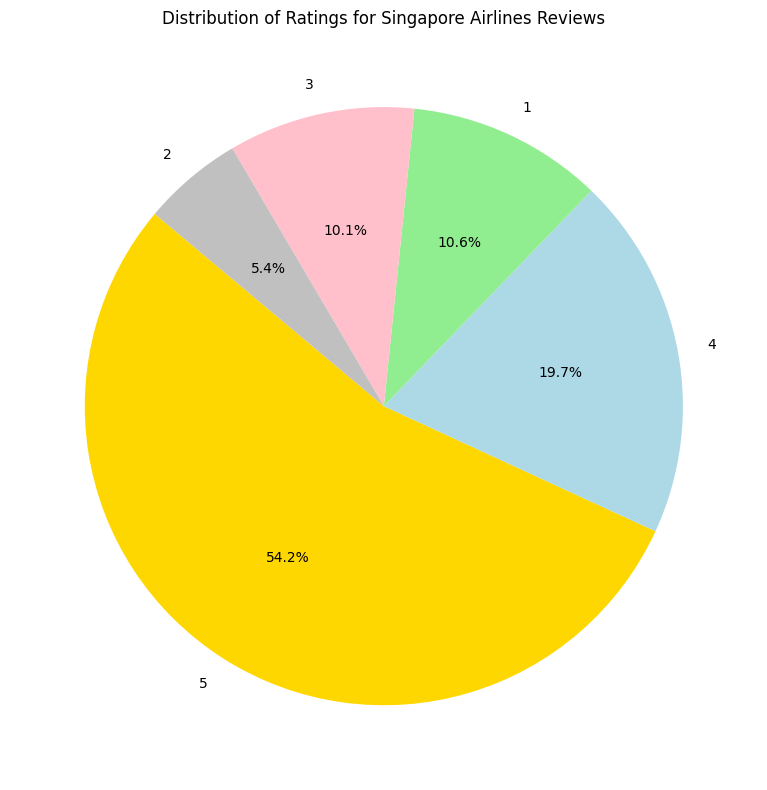

In [8]:
import matplotlib.pyplot as plt

# Pie chart for distribution of ratings
fig, ax = plt.subplots(figsize=(8, 8))
ratings_distribution.plot.pie(autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'pink', 'silver'])
plt.title('Distribution of Ratings for Singapore Airlines Reviews')
plt.ylabel('')  # Remove the y-label as it's unnecessary for a pie chart
plt.tight_layout()
plt.show()

Singapore Airline Review just get 54.2% for 5/5 rating

The number of reviews per platform

(array([0, 1]), [Text(0, 0, 'Desktop'), Text(1, 0, 'Mobile')])

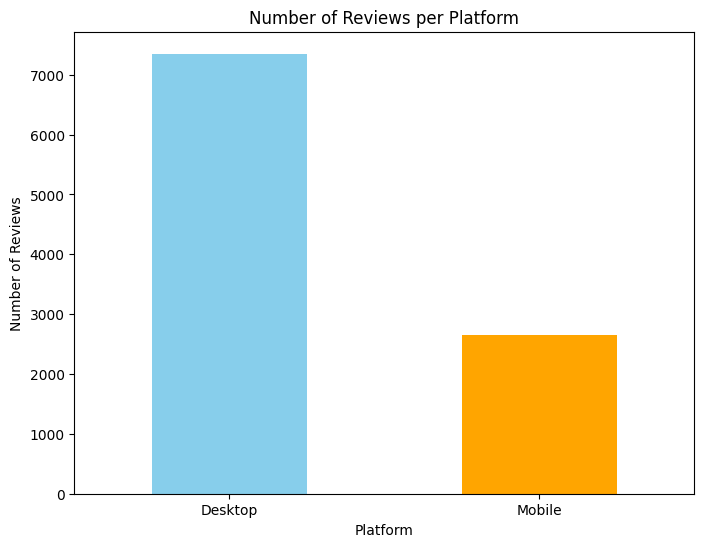

In [9]:
import matplotlib.pyplot as plt

# Bar graph for the number of reviews per platform
fig, bx = plt.subplots(figsize=(8, 6))
reviews_per_platform.plot.bar(color=['skyblue', 'orange'])
plt.title('Number of Reviews per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Keep the platform names horizontal for readability


In [10]:
from collections import Counter
import re

# Regex patterns to identify code-like snippets
code_snippets_pattern = re.compile(
    r'`[^`]+`'  # Inline code marks
    r'|[a-zA-Z_]+\(.*?\)'  # Function calls with parentheses
    r'|\b\d{1,3}(?:\.\d{1,3}){3}\b'  # IP addresses
    r'|\b[A-Za-z_]\w*\b'  # Variables or function names
    , re.DOTALL)

# Extracting snippets
snippets = []
for text in df['text']:
    snippets.extend(code_snippets_pattern.findall(text))

# Counting occurrences of each snippet
snippet_counts = Counter(snippets)

# Display the most common code snippets found in the review texts
most_common_snippets = snippet_counts.most_common(10)

most_common_snippets

[('the', 42022),
 ('and', 31614),
 ('to', 30484),
 ('was', 20241),
 ('a', 19061),
 ('I', 18334),
 ('of', 14110),
 ('in', 13764),
 ('flight', 12015),
 ('Singapore', 11436)]

The most frequently occurring "snippets" were actually just common English words such as "the," "and," "to,", "a", "I" and "was.

Identify presence of specific words that might indicate strong feelings like positive and negative

In [11]:
# Step 1: Calculate the length of each review
df['review_length'] = df['text'].apply(len)

# For simplicity, let's consider "excellent" for positive and "terrible" for negative sentiments
df['contains_excellent'] = df['text'].str.contains('excellent', case=False).astype(int)
df['contains_terrible'] = df['text'].str.contains('terrible', case=False).astype(int)

# Preparing data for visualization
# We'll aggregate data to see if there's a visible trend between the length of reviews, presence of specific words, and ratings
aggregated_data = df.groupby('rating').agg({
    'review_length': 'mean',
    'contains_excellent': 'mean',
    'contains_terrible': 'mean'
}).reset_index()

aggregated_data

,rating,review_length,contains_excellent,contains_terrible
0,1,920.470199,0.021760,0.096500
1,2,871.423573,0.053407,0.071823
2,3,737.867195,0.080278,0.042616
3,4,526.681749,0.149466,0.006101
4,5,431.168326,0.222345,0.002028


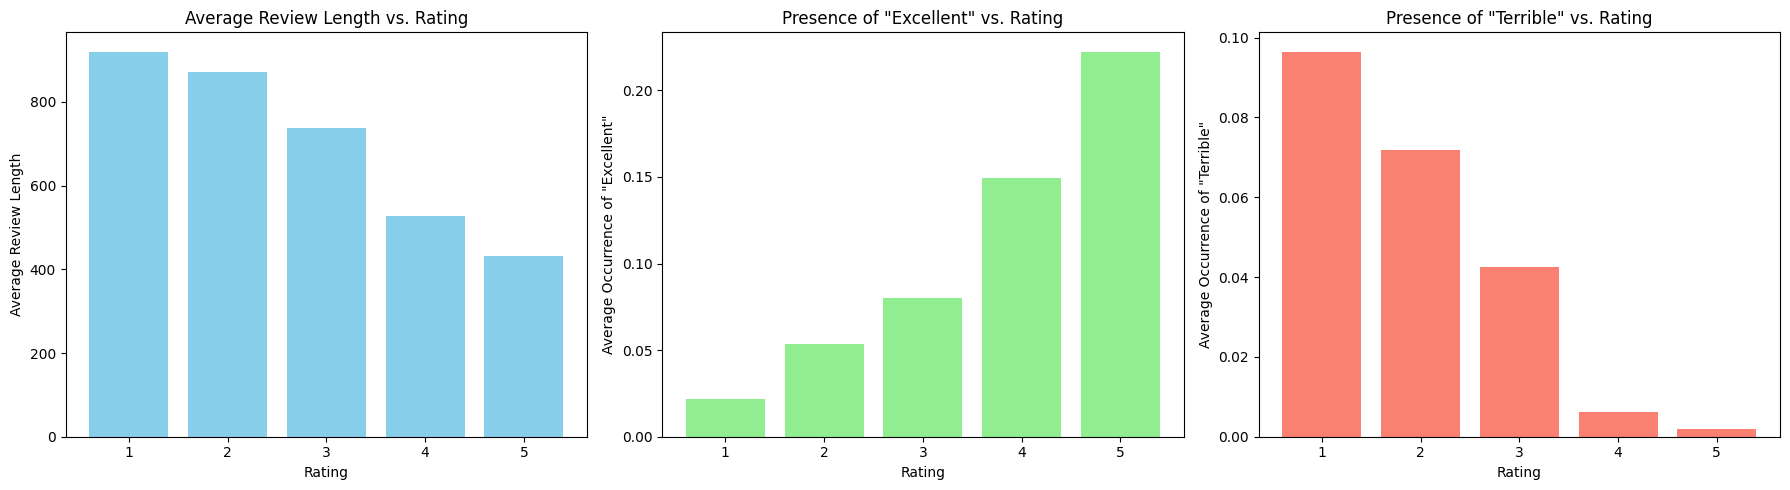

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Review length vs. rating
axes[0].bar(aggregated_data['rating'], aggregated_data['review_length'], color='skyblue')
axes[0].set_title('Average Review Length vs. Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Average Review Length')

# Presence of "excellent" vs. rating
axes[1].bar(aggregated_data['rating'], aggregated_data['contains_excellent'], color='lightgreen')
axes[1].set_title('Presence of "Excellent" vs. Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average Occurrence of "Excellent"')

# Presence of "terrible" vs. rating
axes[2].bar(aggregated_data['rating'], aggregated_data['contains_terrible'], color='salmon')
axes[2].set_title('Presence of "Terrible" vs. Rating')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Average Occurrence of "Terrible"')

plt.tight_layout()
plt.show()

The visualizations further illuminate the relationship between review text characteristics and ratings:

* Average Review Length vs. Rating: This graph shows a clear trend where negative reviews (1 and 2-star ratings) are longer on average than positive reviews (4 and 5-star ratings). It suggests that customers who had negative experiences tend to provide more detailed feedback.

* Presence of "Excellent" vs. Rating: There's a noticeable increase in the occurrence of the word "excellent" in reviews as the ratings go higher. Particularly, 5-star reviews have a significantly higher average occurrence of "excellent," emphasizing the positive sentiment in these reviews.

* Presence of "Terrible" vs. Rating: Conversely, the word "terrible" appears more frequently in lower-rated reviews, with its presence diminishing almost entirely in 5-star reviews. This aligns with the expectation that more negative reviews explicitly mention dissatisfaction.